In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 


In [2]:

# Source data:   git clone https://github.com/CSSEGISandData/COVID-19.git
# lea el archivo con casos confirmados. 
cov19_confirmed = pd.read_csv("../csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
print("Ultimo dia en registros: {}".format(cov19_confirmed.columns[-1]))
cov19_confirmed.head()

Ultimo dia en registros: 3/9/20


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,411,413,414,414,418,418,422,426,428,428
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,102,119,120,124,124


In [3]:
"""
China tiene muchos mas casos que el resto del mundo, es un outlier. 
Entonces vamos a separarlo por provincias. 

Tambien vamos a eliminar el item "Others" que incluye, por ejemplo, cruceros... 
ya que son condiciones no representativas de lo que encontramos en ningun pais. 

"""
# Tomamos los paises fuera de China y de Others.
outside_china = cov19_confirmed[
    (cov19_confirmed['Country/Region']!='Mainland China')
    & (cov19_confirmed['Country/Region']!='Others')]
rest_of_world = outside_china.set_index(pd.Index(outside_china.iloc[:,1])).iloc[:,4:].T

In [4]:
# generamos un dataset de las provincias chinas. 
china = cov19_confirmed[cov19_confirmed['Country/Region']=='Mainland China']
china_provinces = china.set_index(pd.Index(china.iloc[:, 0])).iloc[:,4:].T
china_provinces.head()

Province/State,Anhui,Beijing,Chongqing,Fujian,Gansu,Guangdong,Guangxi,Guizhou,Hainan,Hebei,...,Shaanxi,Shandong,Shanghai,Shanxi,Sichuan,Tianjin,Tibet,Xinjiang,Yunnan,Zhejiang
1/22/20,1,14,6,1,0,26,2,1,4,1,...,0,2,9,1,5,4,0,0,1,10
1/23/20,9,22,9,5,2,32,5,3,5,1,...,3,6,16,1,8,4,0,2,2,27
1/24/20,15,36,27,10,2,53,23,3,8,2,...,5,15,20,1,15,8,0,2,5,43
1/25/20,39,41,57,18,4,78,23,4,19,8,...,15,27,33,6,28,10,0,3,11,62
1/26/20,60,68,75,35,7,111,36,5,22,13,...,22,46,40,9,44,14,0,4,16,104


In [5]:
#unir datos
df = pd.concat([rest_of_world, china_provinces], axis=1)
# group confirmed cases by country
confirmed = df.groupby(by=df.columns, axis=1).sum()
confirmed.head()

,Afghanistan,Albania,Algeria,Andorra,Anhui,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Tunisia,UK,US,Ukraine,United Arab Emirates,Vatican City,Vietnam,Xinjiang,Yunnan,Zhejiang
1/22/20,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,10
1/23/20,0,0,0,0,9,0,0,0,0,0,...,0,0,1,0,0,0,2,2,2,27
1/24/20,0,0,0,0,15,0,0,0,0,0,...,0,0,2,0,0,0,2,2,5,43
1/25/20,0,0,0,0,39,0,0,0,0,0,...,0,0,2,0,0,0,2,3,11,62
1/26/20,0,0,0,0,60,0,0,4,0,0,...,0,0,5,0,0,0,2,4,16,104


In [6]:

country_dict = dict()

for item in confirmed.columns: 
    country_dict[item] = confirmed[item][confirmed[item]>0].reset_index(drop=True)
country_event = pd.DataFrame(country_dict)   



		 Costa Rica is in rank 109 out of 140


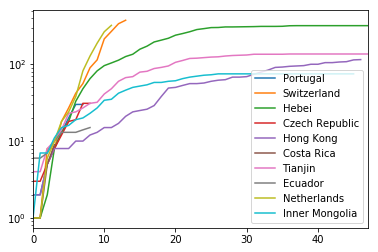

   Portugal  Switzerland  Hebei  Czech Republic  Hong Kong  Costa Rica  \
0       2.0          1.0      1             3.0        2.0         1.0   
1       2.0          1.0      1             3.0        2.0         1.0   
2       5.0          8.0      2             5.0        5.0         5.0   
3       8.0          8.0      8             8.0        8.0         9.0   
4      13.0         18.0     13            12.0        8.0         NaN   
5      20.0         27.0     18            18.0        8.0         NaN   
6      30.0         42.0     33            19.0       10.0         NaN   
7      30.0         56.0     48            31.0       10.0         NaN   
8       NaN         90.0     65            31.0       12.0         NaN   
9       NaN        114.0     82             NaN       13.0         NaN   

   Tianjin  Ecuador  Netherlands  Inner Mongolia  
0        4      6.0          1.0             1.0  
1        4      6.0          1.0             7.0  
2        8      7.0          6.0

In [7]:


def plot_countries_near(place, items=10):
    """
    
    Imprime reporte con pais o region seleccionada. 
    Incluye lugar en el ranking, grafica y tabla. 
    
    Place= lugar seleccionado, debe corresponder a una columna en Country_event 
    items = numero de paises a comparar
    
    """
    # seleccione el dia mas reciente desde evento para el lugar eleguido. 
    days_of_event = country_event[place].dropna().index.max()
    
    df = country_event[country_event.loc[:days_of_event].max().sort_values().index]
    items_per_side= int(items/2)
    loc = df.columns.to_list().index(place)
    print("\n\n\t\t {} is in rank {} out of {}".format(place, loc, len(df.columns)))
    start_idx = max(loc-items_per_side, 0)
    end_idx = min(loc+items_per_side, len(df.columns))
    
    df.iloc[:, start_idx: end_idx].plot(logy=True)
    plt.show()
    
    print(df.iloc[:, start_idx: end_idx].head(10))
    
plot_countries_near("Costa Rica", items=10)



		 US is in rank 124 out of 140


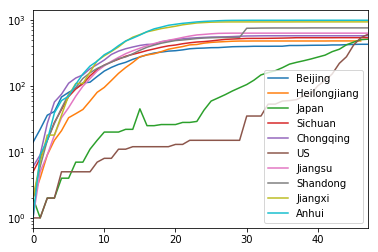

   Beijing  Heilongjiang  Japan  Sichuan  Chongqing  US  Jiangsu  Shandong  \
0       14           2.0      2        5          6   1        1         2   
1       22           4.0      1        8          9   1        5         6   
2       36           9.0      2       15         27   2        9        15   
3       41          15.0      2       28         57   2       18        27   
4       68          21.0      4       44         75   5       33        46   
5       80          33.0      4       69        110   5       47        75   
6       91          38.0      7       90        132   5       70        95   
7      111          44.0      7      108        147   5       99       130   
8      114          59.0     11      142        182   5      129       158   
9      139          80.0     15      177        211   7      168       184   

   Jiangxi  Anhui  
0        2      1  
1        7      9  
2       18     15  
3       18     39  
4       36     60  
5       72     70  
6

In [8]:
plot_countries_near("US", items=10)